# Level 1

In [1]:
import matplotlib as mlp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam, rmsprop
from keras.utils.np_utils import to_categorical
import cv2
import sys
import os

Using TensorFlow backend.


In [2]:
train_directory = "Level 1/train"
test_directory = "Level 1/test"
categories = ["withoutsign","withsign"]

In [3]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
trainval_data = []
IMG_SIZE = 64

def create_trainval_data():
    for category in categories:
        path = os.path.join(train_directory, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            new_img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            trainval_data.append([new_img_array, class_num])        

create_trainval_data()

In [4]:
test_data = []

def create_test_data():
    for category in categories:
        path = os.path.join(test_directory, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            new_img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            test_data.append([new_img_array, class_num])        
create_test_data()

In [5]:
import random
random.seed(42)
random.shuffle(trainval_data)
X = []
y = []

X_test = []
y_test = []

In [6]:
for features, labels in trainval_data:
    X.append(features)
    y.append(labels)
for features, labels in test_data:
    X_test.append(features)
    y_test.append(labels)

In [7]:
X = np.array(X)
y = np.array(y)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [8]:
print(X.shape)
print(y.shape)
print(X_test.shape)
print(y_test.shape)

(197, 64, 64, 3)
(197,)
(41, 64, 64, 3)
(41,)


In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2)

In [10]:
train_datagen = ImageDataGenerator(rotation_range = 40,
                            width_shift_range = 0.2,
                            height_shift_range = 0.2,
                            rescale = 1. / 255,
                            shear_range = 0.2,
                            zoom_range = 0.2)

validation_datagen = ImageDataGenerator(rescale = 1. / 255)

test_datagen = ImageDataGenerator(rescale = 1. / 255)

In [11]:
train_datagen.fit(X_train)
validation_datagen.fit(X_valid)
test_datagen.fit(X_test)

In [12]:
y_train_categorical = to_categorical(y_train, 2)
y_valid_categorical = to_categorical(y_valid, 2)
y_test_categorical = to_categorical(y_test, 2)

In [13]:
channels = 3
train_img_size = len(X_train)
batch_size = 32
validation_img_size = len(X_valid)

In [15]:
from keras.models import load_model

model = load_model('decentmodel.h5')
model.summary()

# model = Sequential()

# model.add(Conv2D(32, (3,3), input_shape = (IMG_SIZE, IMG_SIZE, channels), activation = 'relu', data_format = 'channels_last'))
# model.add(MaxPooling2D(pool_size=(2,2), strides=2))

# model.add(Conv2D(64, (3,3), input_shape = (IMG_SIZE, IMG_SIZE, channels), activation = 'relu'))
# model.add(MaxPooling2D(pool_size=(2,2), strides=2))

# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(0.375))
# model.add(Dense(2))
# model.add(Activation('sigmoid'))
          
# model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
# model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 12544)             0         
_________________________________________________________________
dense_49 (Dense)             (None, 64)                802880    
_________________________________________________________________
activation_49 (Activation)   (None, 64)              

In [17]:
history = model.fit_generator(train_datagen.flow(X_train, y_train_categorical),
                               steps_per_epoch=train_img_size//batch_size,
                               epochs=50,
                               validation_data=validation_datagen.flow(X_valid, y_valid_categorical),
                               validation_steps=validation_img_size//batch_size)

Epoch 1/50
4/4 [==============================] - 1s 141ms/step - loss: 0.0478 - accuracy: 0.9880 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 2/50
4/4 [==============================] - 0s 108ms/step - loss: 0.0317 - accuracy: 0.9961 - val_loss: 9.3936e-04 - val_accuracy: 1.0000
Epoch 3/50
4/4 [==============================] - 0s 113ms/step - loss: 0.0472 - accuracy: 0.9836 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 4/50
4/4 [==============================] - 0s 125ms/step - loss: 0.0166 - accuracy: 1.0000 - val_loss: 2.3988e-04 - val_accuracy: 1.0000
Epoch 5/50
4/4 [==============================] - 0s 108ms/step - loss: 0.0328 - accuracy: 0.9800 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 6/50
4/4 [==============================] - 0s 104ms/step - loss: 0.0375 - accuracy: 0.9880 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 7/50
4/4 [==============================] - 1s 136ms/step - loss: 0.0482 - accuracy: 0.9844 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 8/50
4

In [18]:
score = model.evaluate(X_test, y_test_categorical)

41/41 [==============================] - 0s 1ms/step


In [19]:
score

[36.94354992378049, 0.9512194991111755]

In [20]:
print('Images without sign are labeled as class ', categories.index('withoutsign'))
print('Images with sign are labeled as class ', categories.index('withsign'))

Images without sign are labeled as class  0
Images with sign are labeled as class  1


The random image label is  19


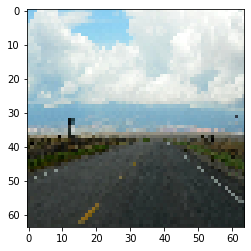

Predicted Sign[0]


In [21]:
random_img = random.randint(0,40)
print("The random image label is ", random_img)
plt.imshow(X_test[random_img])
plt.show()
print('Predicted Sign' + str
         (model.predict_classes(X_test[random_img].reshape(1,64,64,3))))

The random image label is  32


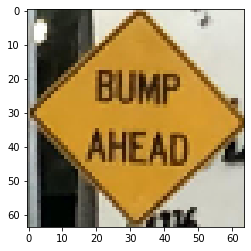

Predicted Sign[1]


In [22]:
random_img = random.randint(0,40)
print("The random image label is ", random_img)
plt.imshow(X_test[random_img])
plt.show()
print('Predicted Sign' + str
         (model.predict_classes(X_test[random_img].reshape(1,64,64,3))))

In [23]:
results = model.predict(X_test)

In [25]:
results_class = np.argmax(results, axis=1, out=None)

In [26]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(results_class, y_test))

[[20  0]
 [ 2 19]]


In [27]:
from sklearn.metrics import classification_report

print(classification_report(results_class, y_test))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        20
           1       1.00      0.90      0.95        21

    accuracy                           0.95        41
   macro avg       0.95      0.95      0.95        41
weighted avg       0.96      0.95      0.95        41



In [28]:
for i in range(len(X_test)):
    print('Predicted Sign' + str
         (model.predict_classes(X_test[i].reshape(1,64,64,3))))

Predicted Sign[0]
Predicted Sign[0]
Predicted Sign[0]
Predicted Sign[0]
Predicted Sign[0]
Predicted Sign[0]
Predicted Sign[0]
Predicted Sign[0]
Predicted Sign[0]
Predicted Sign[1]
Predicted Sign[0]
Predicted Sign[0]
Predicted Sign[0]
Predicted Sign[1]
Predicted Sign[0]
Predicted Sign[0]
Predicted Sign[0]
Predicted Sign[0]
Predicted Sign[0]
Predicted Sign[0]
Predicted Sign[0]
Predicted Sign[0]
Predicted Sign[1]
Predicted Sign[1]
Predicted Sign[1]
Predicted Sign[1]
Predicted Sign[1]
Predicted Sign[1]
Predicted Sign[1]
Predicted Sign[1]
Predicted Sign[1]
Predicted Sign[1]
Predicted Sign[1]
Predicted Sign[1]
Predicted Sign[1]
Predicted Sign[1]
Predicted Sign[1]
Predicted Sign[1]
Predicted Sign[1]
Predicted Sign[1]
Predicted Sign[1]


# Level 2 

In [29]:
train_dir = "Level 2/train"
test_dir = "Level 2/test"
categories = ["guide","regulatory","warning"]

In [33]:
trainval_data = []
IMG_SIZE = 64

def create_trainval_data():
    for category in categories:
        path = os.path.join(train_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            new_img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            trainval_data.append([new_img_array, class_num])

create_trainval_data()

In [34]:
test_data = []

def create_test_data():
    for category in categories:
        path = os.path.join(test_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            new_img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            test_data.append([new_img_array, class_num])        
            
create_test_data()

In [35]:
import random
random.seed(42)
random.shuffle(trainval_data)
X = []
y = []

X_test = []
y_test = []

In [37]:
for features, labels in trainval_data:
    X.append(features)
    y.append(labels)
    
for features, labels in test_data:
    X_test.append(features)
    y_test.append(labels)

In [38]:
X = np.array(X)
y = np.array(y)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [39]:
print(X.shape)
print(y.shape)
print(X_test.shape)
print(y_test.shape)

(308, 64, 64, 3)
(308,)
(30, 64, 64, 3)
(30,)


In [40]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2)

In [41]:
train_datagen = ImageDataGenerator(rotation_range = 40,
                            width_shift_range = 0.2,
                            height_shift_range = 0.2,
                            rescale = 1. / 255,
                            shear_range = 0.2,
                            zoom_range = 0.2)

validation_datagen = ImageDataGenerator(rescale = 1. / 255)

test_datagen = ImageDataGenerator(rescale = 1. / 255)

In [42]:
train_datagen.fit(X_train)
validation_datagen.fit(X_valid)
test_datagen.fit(X_train)

In [43]:
y_train_categorical = to_categorical(y_train, 3)
y_valid_categorical = to_categorical(y_valid, 3)
y_test_categorical = to_categorical(y_test, 3)

In [44]:
channels = 3
train_img_size = len(X_train)
batch_size = 64
validation_img_size = len(X_valid)

In [45]:
model = load_model('latestmodell2.h5')
model.summary()


#model = Sequential()

#model.add(Conv2D(32, (3,3), input_shape = (IMG_SIZE, IMG_SIZE, channels), activation = 'relu', data_format = 'channels_last'))
#model.add(MaxPooling2D(pool_size=(2,2), strides=2))

#model.add(Conv2D(64, (3,3), activation = 'relu'))
#model.add(MaxPooling2D(pool_size=(2,2), strides=2))

#model.add(Flatten())
#model.add(Dense(64))
#model.add(Activation('relu'))
#model.add(Dropout(0.375))
#model.add(Dense(3))
#model.add(Activation('softmax'))
          
#model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
#model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                802880    
_________________________________________________________________
activation_1 (Activation)    (None, 64)               

In [46]:
history = model.fit(train_datagen.flow(X_train, y_train_categorical),
                              validation_data=validation_datagen.flow(X_valid, y_valid_categorical),
                                                                      epochs=100)

Epoch 1/100
8/8 [==============================] - 1s 137ms/step - loss: 0.0373 - accuracy: 0.9878 - val_loss: 1.9922e-04 - val_accuracy: 1.0000
Epoch 2/100
8/8 [==============================] - 1s 100ms/step - loss: 0.0343 - accuracy: 0.9837 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 3/100
8/8 [==============================] - 1s 107ms/step - loss: 0.0376 - accuracy: 0.9837 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 4/100
8/8 [==============================] - 1s 105ms/step - loss: 0.0292 - accuracy: 0.9959 - val_loss: 5.8862e-04 - val_accuracy: 1.0000
Epoch 5/100
8/8 [==============================] - 1s 106ms/step - loss: 0.0231 - accuracy: 0.9878 - val_loss: 7.0936e-04 - val_accuracy: 0.9839
Epoch 6/100
8/8 [==============================] - 1s 106ms/step - loss: 0.0184 - accuracy: 0.9878 - val_loss: 0.0065 - val_accuracy: 1.0000
Epoch 7/100
8/8 [==============================] - 1s 104ms/step - loss: 0.0262 - accuracy: 0.9959 - val_loss: 0.0098 - val_accuracy: 1.0000
E

8/8 [==============================] - 1s 110ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 3.2977e-04 - val_accuracy: 1.0000
Epoch 58/100
8/8 [==============================] - 1s 100ms/step - loss: 0.0069 - accuracy: 0.9959 - val_loss: 2.3921e-06 - val_accuracy: 0.9839
Epoch 59/100
8/8 [==============================] - 1s 128ms/step - loss: 0.0153 - accuracy: 0.9959 - val_loss: 4.8058e-04 - val_accuracy: 1.0000
Epoch 60/100
8/8 [==============================] - 1s 106ms/step - loss: 0.0097 - accuracy: 0.9959 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 61/100
8/8 [==============================] - 1s 115ms/step - loss: 0.0173 - accuracy: 0.9919 - val_loss: 1.1398e-04 - val_accuracy: 1.0000
Epoch 62/100
8/8 [==============================] - 1s 107ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 1.8726e-04 - val_accuracy: 1.0000
Epoch 63/100
8/8 [==============================] - 1s 103ms/step - loss: 0.0144 - accuracy: 0.9959 - val_loss: 0.0038 - val_accuracy: 1.0000

In [47]:
score = model.evaluate(X_test, y_test_categorical)

30/30 [==============================] - 0s 3ms/step


In [48]:
score

[77.5342788696289, 0.8999999761581421]

The random image label is  7


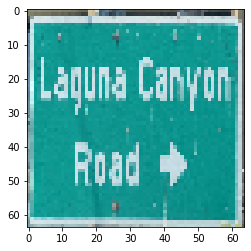

Predicted Sign[0]


In [49]:
#plt.imshow(X_test[6])
random_img = random.randint(0,29)
print("The random image label is ", random_img)
plt.imshow(X_test[random_img])
plt.show()
print('Predicted Sign' + str
         (model.predict_classes(X_test[random_img].reshape(1,64,64,3))))

The random image label is  14


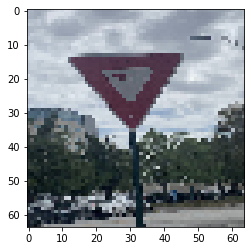

Predicted Sign[1]


In [57]:
#plt.imshow(X_test[6])
random_img = random.randint(0,29)
print("The random image label is ", random_img)
plt.imshow(X_test[random_img])
plt.show()
print('Predicted Sign' + str
         (model.predict_classes(X_test[random_img].reshape(1,64,64,3))))

The random image label is  22


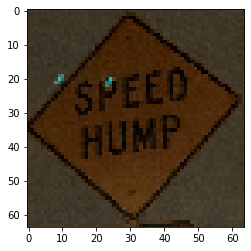

Predicted Sign[2]


In [51]:
#plt.imshow(X_test[6])
random_img = random.randint(0,29)
print("The random image label is ", random_img)
plt.imshow(X_test[random_img])
plt.show()
print('Predicted Sign' + str
         (model.predict_classes(X_test[random_img].reshape(1,64,64,3))))

In [52]:
for i in range(len(X_test)):
    print('Predicted Sign' + str
         (model.predict_classes(X_test[i].reshape(1,64,64,3))))

Predicted Sign[0]
Predicted Sign[0]
Predicted Sign[0]
Predicted Sign[0]
Predicted Sign[2]
Predicted Sign[0]
Predicted Sign[0]
Predicted Sign[0]
Predicted Sign[0]
Predicted Sign[0]
Predicted Sign[1]
Predicted Sign[1]
Predicted Sign[1]
Predicted Sign[1]
Predicted Sign[1]
Predicted Sign[2]
Predicted Sign[1]
Predicted Sign[1]
Predicted Sign[1]
Predicted Sign[2]
Predicted Sign[2]
Predicted Sign[2]
Predicted Sign[2]
Predicted Sign[2]
Predicted Sign[2]
Predicted Sign[2]
Predicted Sign[2]
Predicted Sign[2]
Predicted Sign[2]
Predicted Sign[2]


In [53]:
y_pred = model.predict(X_test)

In [58]:
results_class = np.argmax(y_pred, axis=1, out=None)

In [59]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(results_class, y_test))

[[ 9  0  0]
 [ 0  8  0]
 [ 1  2 10]]


In [60]:
from sklearn.metrics import classification_report

print(classification_report(results_class, y_test))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.80      1.00      0.89         8
           2       1.00      0.77      0.87        13

    accuracy                           0.90        30
   macro avg       0.90      0.92      0.90        30
weighted avg       0.92      0.90      0.90        30



# Level 3

In [61]:
train_dir = "Level 3/train"
test_dir = "Level 3/test"
categories = ["guide","regulatory","warning"]

In [62]:
trainval_data = []
IMG_SIZE = 64

def create_trainval_data():
    for category in categories:
        path = os.path.join(train_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            new_img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            trainval_data.append([new_img_array, class_num])

create_trainval_data()

In [63]:
test_data = []

def create_test_data():
    for category in categories:
        path = os.path.join(test_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            new_img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            test_data.append([new_img_array, class_num])        
            
create_test_data()

In [64]:
import random
random.seed(42)
random.shuffle(trainval_data)
X = []
y = []

X_test = []
y_test = []

In [65]:
for features, labels in trainval_data:
    X.append(features)
    y.append(labels)
    
for features, labels in test_data:
    X_test.append(features)
    y_test.append(labels)

In [66]:
X = np.array(X)
y = np.array(y)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [67]:
print(X.shape)
print(y.shape)
print(X_test.shape)
print(y_test.shape)

(226, 64, 64, 3)
(226,)
(25, 64, 64, 3)
(25,)


In [68]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2)

In [69]:
train_datagen = ImageDataGenerator(rotation_range = 40,
                            width_shift_range = 0.2,
                            height_shift_range = 0.2,
                            rescale = 1. / 255,
                            shear_range = 0.2,
                            zoom_range = 0.2)

validation_datagen = ImageDataGenerator(rescale = 1. / 255)

test_datagen = ImageDataGenerator(rescale = 1. / 255)

In [70]:
train_datagen.fit(X_train)
validation_datagen.fit(X_valid)
test_datagen.fit(X_train)

In [71]:
y_train_categorical = to_categorical(y_train, 3)
y_valid_categorical = to_categorical(y_valid, 3)
y_test_categorical = to_categorical(y_test, 3)

In [72]:
channels = 3
train_img_size = len(X_train)
batch_size = 64
validation_img_size = len(X_valid)

In [73]:
model = load_model('decentmodel3.h5')
model.summary()

#model = Sequential()

#model.add(Conv2D(32, (3,3), input_shape = (IMG_SIZE, IMG_SIZE, channels), activation = 'relu', data_format = 'channels_last'))
#model.add(MaxPooling2D(pool_size=(2,2), strides=2))

#model.add(Conv2D(64, (3,3), activation = 'relu'))
#model.add(MaxPooling2D(pool_size=(2,2), strides=2))

#model.add(Flatten())
#model.add(Dense(64))
#model.add(Activation('relu'))
#model.add(Dropout(0.375))
#model.add(Dense(3))
#model.add(Activation('softmax'))
          
#model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                802880    
_________________________________________________________________
activation_1 (Activation)    (None, 64)               

In [74]:
history = model.fit(train_datagen.flow(X_train, y_train_categorical),
                              validation_data=validation_datagen.flow(X_valid, y_valid_categorical),
                                                                      epochs=250)

Epoch 1/250
6/6 [==============================] - 1s 141ms/step - loss: 0.3890 - accuracy: 0.8500 - val_loss: 0.2005 - val_accuracy: 0.8913
Epoch 2/250
6/6 [==============================] - 1s 119ms/step - loss: 0.3336 - accuracy: 0.8833 - val_loss: 0.3264 - val_accuracy: 0.8913
Epoch 3/250
6/6 [==============================] - 1s 111ms/step - loss: 0.3009 - accuracy: 0.9167 - val_loss: 0.4876 - val_accuracy: 0.7826
Epoch 4/250
6/6 [==============================] - 1s 108ms/step - loss: 0.4101 - accuracy: 0.8500 - val_loss: 0.3323 - val_accuracy: 0.8478
Epoch 5/250
6/6 [==============================] - 1s 125ms/step - loss: 0.3279 - accuracy: 0.8500 - val_loss: 0.5354 - val_accuracy: 0.8696
Epoch 6/250
6/6 [==============================] - 1s 116ms/step - loss: 0.3138 - accuracy: 0.8944 - val_loss: 0.1685 - val_accuracy: 0.8913
Epoch 7/250
6/6 [==============================] - 1s 98ms/step - loss: 0.3477 - accuracy: 0.8778 - val_loss: 0.1913 - val_accuracy: 0.9130
Epoch 8/250
6/

Epoch 59/250
6/6 [==============================] - 1s 104ms/step - loss: 0.1769 - accuracy: 0.9278 - val_loss: 0.3132 - val_accuracy: 0.8478
Epoch 60/250
6/6 [==============================] - 1s 120ms/step - loss: 0.2188 - accuracy: 0.9333 - val_loss: 0.6462 - val_accuracy: 0.8696
Epoch 61/250
6/6 [==============================] - 1s 110ms/step - loss: 0.2062 - accuracy: 0.9333 - val_loss: 0.2792 - val_accuracy: 0.8478
Epoch 62/250
6/6 [==============================] - 1s 105ms/step - loss: 0.1559 - accuracy: 0.9556 - val_loss: 0.1502 - val_accuracy: 0.8913
Epoch 63/250
6/6 [==============================] - 1s 112ms/step - loss: 0.1296 - accuracy: 0.9667 - val_loss: 0.6624 - val_accuracy: 0.9130
Epoch 64/250
6/6 [==============================] - 1s 115ms/step - loss: 0.2204 - accuracy: 0.9167 - val_loss: 1.0435 - val_accuracy: 0.8696
Epoch 65/250
6/6 [==============================] - 1s 130ms/step - loss: 0.1224 - accuracy: 0.9667 - val_loss: 0.5866 - val_accuracy: 0.9130
Epoch 

6/6 [==============================] - 1s 105ms/step - loss: 0.1551 - accuracy: 0.9667 - val_loss: 0.1449 - val_accuracy: 0.8913
Epoch 117/250
6/6 [==============================] - 1s 110ms/step - loss: 0.0872 - accuracy: 0.9833 - val_loss: 0.5552 - val_accuracy: 0.8261
Epoch 118/250
6/6 [==============================] - 1s 113ms/step - loss: 0.1151 - accuracy: 0.9722 - val_loss: 1.6750 - val_accuracy: 0.8696
Epoch 119/250
6/6 [==============================] - 1s 108ms/step - loss: 0.1084 - accuracy: 0.9556 - val_loss: 0.4456 - val_accuracy: 0.8696
Epoch 120/250
6/6 [==============================] - 1s 103ms/step - loss: 0.1578 - accuracy: 0.9667 - val_loss: 0.6194 - val_accuracy: 0.8261
Epoch 121/250
6/6 [==============================] - 1s 103ms/step - loss: 0.1224 - accuracy: 0.9611 - val_loss: 1.2085 - val_accuracy: 0.8696
Epoch 122/250
6/6 [==============================] - 1s 103ms/step - loss: 0.2107 - accuracy: 0.9500 - val_loss: 1.3562 - val_accuracy: 0.8478
Epoch 123/250

6/6 [==============================] - 1s 113ms/step - loss: 0.0617 - accuracy: 0.9833 - val_loss: 0.1247 - val_accuracy: 0.9130
Epoch 174/250
6/6 [==============================] - 1s 103ms/step - loss: 0.0736 - accuracy: 0.9833 - val_loss: 0.3867 - val_accuracy: 0.8913
Epoch 175/250
6/6 [==============================] - 1s 114ms/step - loss: 0.1428 - accuracy: 0.9444 - val_loss: 0.3189 - val_accuracy: 0.8913
Epoch 176/250
6/6 [==============================] - 1s 121ms/step - loss: 0.1851 - accuracy: 0.9556 - val_loss: 0.4705 - val_accuracy: 0.8478
Epoch 177/250
6/6 [==============================] - 1s 146ms/step - loss: 0.1177 - accuracy: 0.9667 - val_loss: 1.5293 - val_accuracy: 0.8913
Epoch 178/250
6/6 [==============================] - 1s 106ms/step - loss: 0.1093 - accuracy: 0.9667 - val_loss: 0.1112 - val_accuracy: 0.8696
Epoch 179/250
6/6 [==============================] - 1s 106ms/step - loss: 0.0681 - accuracy: 0.9833 - val_loss: 1.4412 - val_accuracy: 0.8913
Epoch 180/250

6/6 [==============================] - 1s 128ms/step - loss: 0.0710 - accuracy: 0.9833 - val_loss: 0.9777 - val_accuracy: 0.9130
Epoch 231/250
6/6 [==============================] - 1s 105ms/step - loss: 0.0843 - accuracy: 0.9833 - val_loss: 0.9697 - val_accuracy: 0.8261
Epoch 232/250
6/6 [==============================] - 1s 103ms/step - loss: 0.0693 - accuracy: 0.9833 - val_loss: 0.7016 - val_accuracy: 0.9130
Epoch 233/250
6/6 [==============================] - 1s 123ms/step - loss: 0.0908 - accuracy: 0.9722 - val_loss: 0.6624 - val_accuracy: 0.8913
Epoch 234/250
6/6 [==============================] - 1s 117ms/step - loss: 0.0784 - accuracy: 0.9722 - val_loss: 0.8930 - val_accuracy: 0.8261
Epoch 235/250
6/6 [==============================] - 1s 106ms/step - loss: 0.1322 - accuracy: 0.9500 - val_loss: 0.1315 - val_accuracy: 0.8913
Epoch 236/250
6/6 [==============================] - 1s 144ms/step - loss: 0.0508 - accuracy: 0.9944 - val_loss: 0.6795 - val_accuracy: 0.9130
Epoch 237/250

In [75]:
score = model.evaluate(X_test, y_test_categorical)

25/25 [==============================] - 0s 2ms/step


In [76]:
score

[0.5176934599876404, 0.9200000166893005]

The random image label is  22


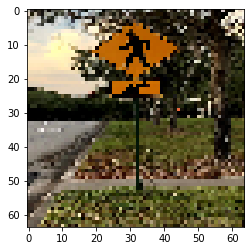

Predicted Sign[2]


In [77]:
random_img = random.randint(0,24)
print("The random image label is ", random_img)
plt.imshow(X_test[random_img])
plt.show()
print('Predicted Sign' + str
         (model.predict_classes(X_test[random_img].reshape(1,64,64,3))))

The random image label is  9


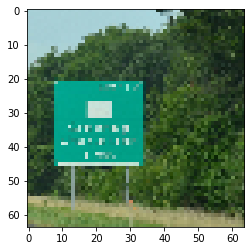

Predicted Sign[0]


In [85]:
random_img = random.randint(0,24)
print("The random image label is ", random_img)
plt.imshow(X_test[random_img])
plt.show()
print('Predicted Sign' + str
         (model.predict_classes(X_test[random_img].reshape(1,64,64,3))))

The random image label is  12


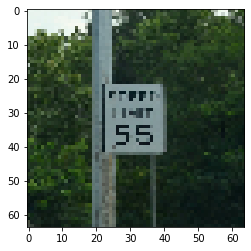

Predicted Sign[1]


In [87]:
random_img = random.randint(0,24)
print("The random image label is ", random_img)
plt.imshow(X_test[random_img])
plt.show()
print('Predicted Sign' + str
         (model.predict_classes(X_test[random_img].reshape(1,64,64,3))))

In [80]:
for i in range(len(X_test)):
    print('Predicted Sign' + str
         (model.predict_classes(X_test[i].reshape(1,64,64,3))))

Predicted Sign[0]
Predicted Sign[0]
Predicted Sign[0]
Predicted Sign[0]
Predicted Sign[0]
Predicted Sign[0]
Predicted Sign[0]
Predicted Sign[0]
Predicted Sign[0]
Predicted Sign[0]
Predicted Sign[2]
Predicted Sign[1]
Predicted Sign[1]
Predicted Sign[1]
Predicted Sign[1]
Predicted Sign[1]
Predicted Sign[1]
Predicted Sign[0]
Predicted Sign[1]
Predicted Sign[1]
Predicted Sign[2]
Predicted Sign[2]
Predicted Sign[2]
Predicted Sign[2]
Predicted Sign[2]


In [81]:
y_pred = model.predict(X_test)

In [82]:
results_class = np.argmax(y_pred, axis=1, out=None)

In [83]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(results_class, y_test))

[[10  1  0]
 [ 0  8  0]
 [ 0  1  5]]


In [84]:
from sklearn.metrics import classification_report

print(classification_report(results_class, y_test))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.80      1.00      0.89         8
           2       1.00      0.83      0.91         6

    accuracy                           0.92        25
   macro avg       0.93      0.91      0.92        25
weighted avg       0.94      0.92      0.92        25

